# Changing Leadership at UNHCR: Trends in High Commissioner Speeches
### Jeffrey Woodham 
### PPOL 628



## Table of Contents

1. [Background](#Background)
2. [Methodology](#Methodology)
3. [Exploratory Analysis](#Exploratory-Analysis)
4. [Topic Model](#Topic-Model)
    1. [Identifying Topics with LDA](#Identifying-Topics-with-Latent-Dirichlet-Allocation-(LDA)) 
    2. [Trends in Topics](#Trends-in-Topics)
5. [Conclusion](#Conclusion)
   

## Background

The office of the United Nations High Commissioner for Refugees was founded in 1950 to help Europeans who had fled their homes during World War II. Since then, its scope has expanded considerably in terms of geography – today working in 132 countries worldwide, population of interest – now to include all refugees, internally displaced people, stateless people, and most recently, economic migrants from Venezuelan crisis, and locale of intervention – shifting from an almost exclusively camp-focused approach to include the considerable number of urban refugees. More recently, UNHCR has launched efforts to decentralize and regionalize its work, better address the needs of LGBTIQ+ forcibly displaced people, and introduce innovative applications of technology in the humanitarian sector. While the agency’s mandate has remained relatively stable over its 70-year history, its approach and priorities are constantly evolving.

At the head of the agency and its evolution is the High Commissioner. Elected by the U.N. General Assembly with a five-year mandate (and the possibility of re-election), there have been 11 high commissioners since the agency’s establishment, with most serving mandates from five to ten years. While most have western and northern European nationalities, one – Sadruddin Aga Khan – was Iranian, and another  - Sadako Ogata – was Japanese. As the head of the agency, the commissioner ensures that the agency effectively carries out its mandate to protect forcibly displaced people. And, as with the head of any organization, each commissioner brings their own experiences, personalities, and assumptions to bear as they carry out their duties. However, they do so at the head of a large, bureaucratic, and – per its statute – “entirely non-political” agency operating under the authority of the member states of the United Nations General Assembly. 

These potentially conflicting forces raise the question: __to what extent are High Commissioners able to bring and implement their own agendas at the agency?__   

Sources:
- UNHCR Background: https://www.unhcr.org/

## Methodology

### Dataset

As the public face of the agency, High Commissioners lay out positions and policies in public-facing speeches, shared on UNHCR’s website. Ben Rudolph has produced a dataset consisting of the 703 public speeches available on the website made by the High Commissioner from 1951 to June 2014, including the commissioner, date, title, and speech content.  Assuming these speeches reflect the agenda of the orator, this corpus will enable us to analyze how UNHCR’s priorities change over time using topic modeling. While we would expect these trends to follow broader global trends (for example, a greater focus on protracted situations of displacement over the past two decades), we can also look at shifts in topics over time, and particularly at transitions between commissioners, to see the extent to which commissioners introduce their own agenda.

### Approach

In order to answer my research question, analyze speech content from 1951 through June 2014 through:
- Preprocessing
- Exploratory analysis 
    - high frequency words by High Commissioner
    - high frequency words by decade
- Topic Modeling
    - Latent Dirilecht Allocation
    - Define main topics
    - Track topics over time
- Discussion

Sources: 
- Dataset: https://www.kaggle.com/datasets/benrudolph/unhcr-speeches

### Preprocessing

#### Cleaning and Extracting Features

For the purposes of my analysis, I treat the dataset as a corpus, with each of the 703 speeches representing a document. Of those speeches, the vast majority are in English; however, a small number are either entirely or partially in French or Spanish. To facilitate my analysis, I drop speeches that include either the French or Spanish word for UNHCR ('Anur' or 'Acnur') or refugees ('réfugiés' or 'refugiados'), since all speeches reference either UNHCR or the United Nations High Commissioner for Refugees in the introctory text in this dataset. My final corpus thus includes 693 documents.

Each speech begins with the title, location, and date of the remarks, followed by the speech content itself (which represents my text for analysis, and will hereafter be referred to as the text). To ensure consistency of features, I reproduced the title, date, and speech content columns using regular expressions and following the standard general structure of the text:

- {Title} Statements by the High Commissioner, {Date} {Remarks}

Line breaks and double spaces in the resulting speech content column were replaced with spaces, dates were removed - if the speaker is talking about a time-bound event, I expect that will come out of discussion of the event itself rather than just when it occurred, and all text was set to lower case, since I do not expect the differences in meanings of capitalized and non-capitalized versions of the same word to significantly effect interpretation. 

#### Punctuation

All punctuation was stripped from the text. While in general punctuation may affect _how_ topics are discussed, 1) my goal is here to examine _what_ topics are discussed, and 2) since these are formal speeches, I don't expect the text to include emotive punctuation like exclamation points.

#### Numbers

All numbers were stripped from the text. While numbers are a common feature of UNHCR communications (particularly the number of refugees or displaced people), focuses on large quantities of refugees or displaced people are usually discussed in terms of thosuands or millions so would still be captured. What may be lost with this is an increased focus on data (quantities, percentages) in the humanitarian sector in recent years.

#### Lowercasing

All text was set to lower case, since I do not expect signifiant differences in meanings of capitalized and non-capitalized versions of the same word. The inclusion of bi-grams should account differences such as "united nations" (nations that are united) vs. "United Nations" (the organization). 


#### Lemmatization
 
The text is lemmatized to converts all tokens to their meaningful based form, increasing accuracy over stemming. While this is more computationally expensive than stemming, the limited size of the corpus makes this a viable option.

#### Stopword Removal

Stopwords are removed from each document. Stopwords include the WordNet list of English stopwords, in addition to domain-specific words that are either irrelevant (e.g., 'as delivered', 'excellency', 'highness', 'chairman') and/or expected to be high frequency with limited utility in this context (e.g., 'united nations', 'unhcr',' high commissioner').  
 
 



## Exploratory Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gensim
from gensim import corpora, models
from gensim.corpora import Dictionary, MmCorpus
from gensim.models import Phrases, LdaModel
from gensim.test.utils import datapath
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle

C:\Users\jeffw\miniforge3\envs\unhcr_speeches\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [2]:
!dvc pull

Everything is up to date.


In [3]:
# Pull in data

df = pd.read_feather('data/descriptive')

In [4]:
# Quick check top words

pd.DataFrame(df.speech.value_counts().head(20))

,speech
international,5407
problem,5119
humanitarian,4741
people,4610
government,4442
protection,4346
need,4234
office,4207
solution,3691
new,3493


### Overall High Frequency Words

The top words across all speeches aren't particularly surprising. UNHCR is an international organization that addresses an international humanitarian "problem", and it works with and adcovates on behalf of refugees to governments to attempt to find solutions and provide assistance to refugees and asylumseekers. All of these words broadly related to UNHCR's mandate. It would, however, be interesting to see if the composition of these top words change between high commissioners and over time. 

In [88]:
### Generate top word counts by commissioner

freq = pd.DataFrame(df.groupby('speaker')['speech']
                        .value_counts()
                        .groupby(level=0, group_keys=False).head(10)
                       )
freq.columns = ['freq']
freq = freq.reset_index()
freq.columns = ['speaker', 'word', 'freq']

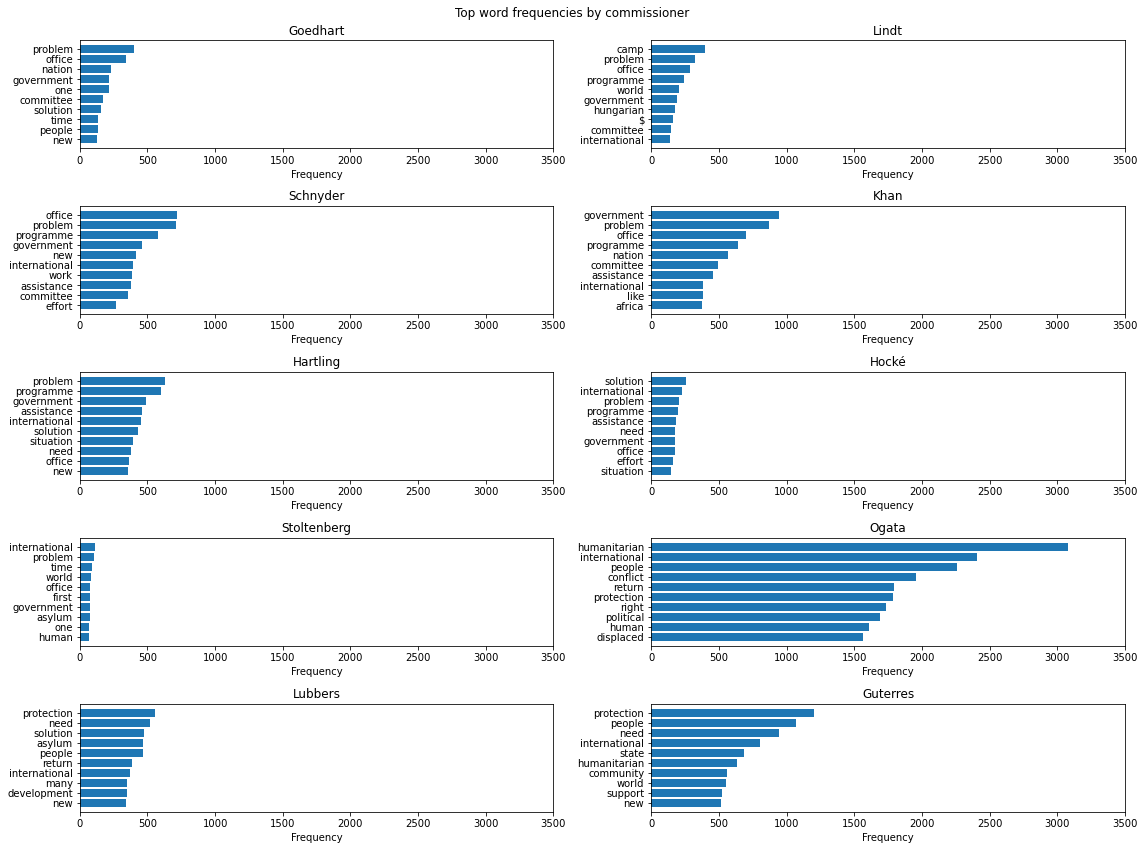

In [89]:
### Plot word frequencies by commissioner

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(5, 2, figsize=(16, 12))

plt.suptitle("Top word frequencies by commissioner")

speaker = ['Goedhart', 
           'Lindt', 
           'Schnyder', 
           'Khan', 
           'Hartling', 
           'Hocké', 
           'Stoltenberg', 
           'Ogata', 
           'Lubbers', 
           'Guterres']
j = 1

for n in speaker:
    a = eval('ax' + str(j))
    
    y_pos = freq[freq.speaker == n].word
    
    count = freq[freq.speaker == n].freq
    
    a.barh(y_pos, count)
    
    a.set_yticks(y_pos, labels=freq[freq.speaker == n].word)
    a.invert_yaxis()
    a.set_xlabel('Frequency')
    a.set_title(n)
    a.set(xlim=(0,3500))
    
    j = j + 1

plt.tight_layout()

### High Frequency Words by Commissioner

The most striking differences between commissioners is the number of words the frequencies of top words spoken by Ogata compared to the rest of the commissioners. The average tenure of high commissioners is approximately five years. By 2014, Ogata had served the second longest tenure (ten years) of any high commissioner after Khan, and she had served only one year longer than Guterres. Yet the frequencies of her top words are over three times as high as those of most other commissioners, including Khan, and nearly double those of Guterres. It is also worth noting that under Ogata, humanitarian has the highest frequency, when it is not among the top words of any of her predecessors, and that she is the first commissioner to have protection as a key word, after which her successors have it as their highest frequency word. Ogata's tenure may indicate a shift in UNHCR's posturing. 

The dominance of Ogata also raises questions - was she giving more speeches? was she giving longer speeches? was her messaging just more focused? A frequency table of speeches by commissioner (below) shows that Ogata gave substantially more speeches than any other commissioner. This is interesting first because it seems that she (or circumstances) expanded the outreach role of the commissioner, particularly considering the next two most frequent speechgivers were her two successors. But it is also interesting because it raises the concern of her speeches driving the topic modelling later in this report.  

In [76]:
df.drop_duplicates('id').groupby('speaker')['speaker'].value_counts()

speaker      speaker    
Goedhart     Goedhart        26
Guterres     Guterres       113
Hartling     Hartling        54
Hocké        Hocké           20
Khan         Khan            64
Lindt        Lindt           24
Lubbers      Lubbers         72
Ogata        Ogata          265
Schnyder     Schnyder        41
Stoltenberg  Stoltenberg     14
Name: speaker, dtype: int64

In [91]:
freq = pd.DataFrame(df.groupby('decade')['speech']
                        .value_counts()
                        .groupby(level=0, group_keys=False).head(10)
                       )
freq.columns = ['freq']
freq = freq.reset_index()
freq.columns = ['decade', 'word', 'freq']

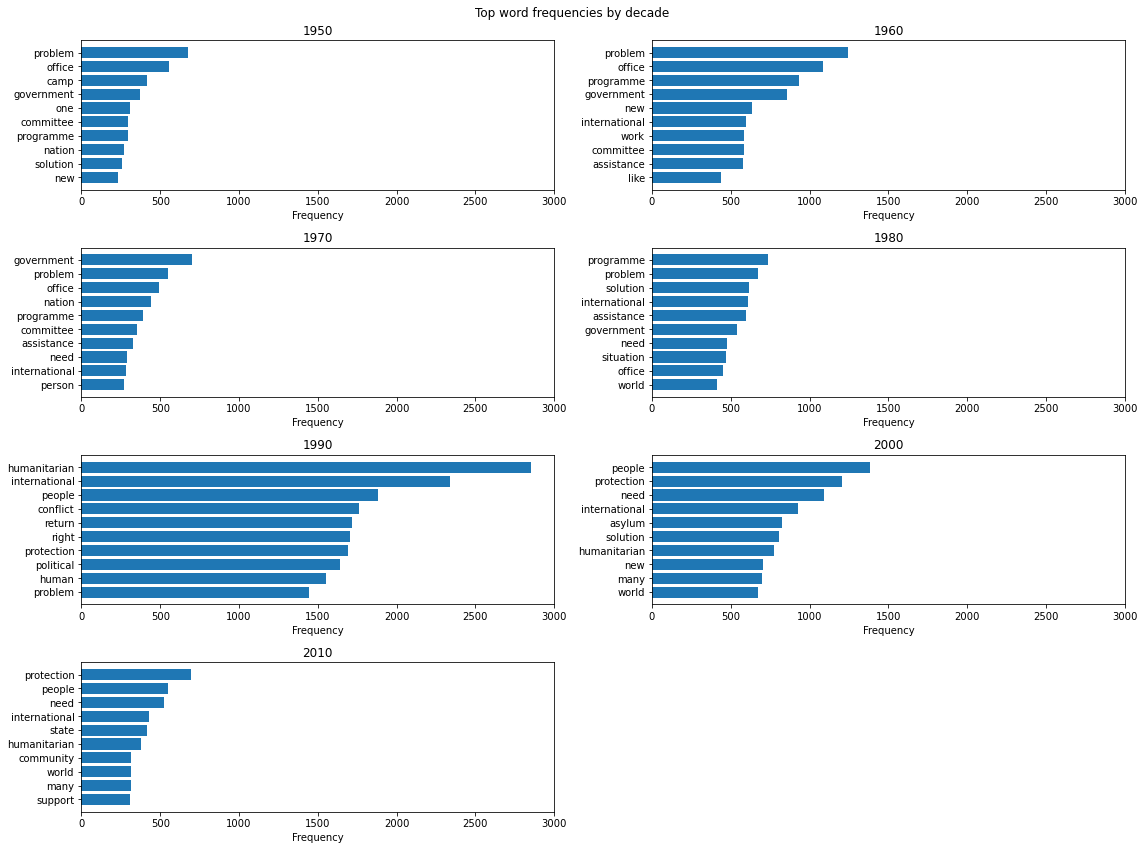

In [92]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(16, 12))

plt.suptitle("Top word frequencies by decade")

j = 1
decade = [1950, 1960, 1970, 1980, 1990, 2000, 2010]

for n in decade:
    a = eval('ax' + str(j))
    
    y_pos = freq[freq.decade == n].word
    
    count = freq[freq.decade == n].freq
    
    a.barh(y_pos, count)
    
    a.set_yticks(y_pos, labels=freq[freq.decade == n].word)
    a.invert_yaxis()
    a.set_xlabel('Frequency')
    a.set_title(n)
    a.set(xlim = (0,3000))
    
    j = j + 1

fig.delaxes(ax8)
plt.tight_layout()

### High Frequency Words by Decade 

We can also look at high frequency words by decade to attempt to disentangle the effects of the commissioner from the effects of the events occurring during their tenure. Given the length of commissioner tenure, these graphs are largely similar to the previous ones - we see the same pivot towards protection and humanitarianism from the nineties, and a focus on problems and programming in the decades preceding. 

## Topic Model

In [9]:
# Pull in model

topic_model = gensim.models.ldamodel.LdaModel.load('lda_model')
dictionary = corpora.Dictionary.load('speech.dict')
corpus = corpora.MmCorpus('speech.mm')
with open('data/docs', 'rb') as fp:
    docs = pickle.load(fp)
with open('data/docs_tagged', 'rb') as fp:
    docs_tagged = pickle.load(fp)

In [10]:
vis_data = gensimvis.prepare(topic_model, corpus, dictionary)

C:\Users\jeffw\miniforge3\envs\unhcr_speeches\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


### Identifying Topics with Latent Dirichlet Allocation (LDA)

I used LDA to identify ten topics in the documents in my corpus. Tokens were included that appeared in at least three documents and no more than 80 percent of documents in the corpus. I did this to exclude one-off topics (i.e. things the high commissioner may have mentioned once in a speech but that wouldn't reflect a sustained policy/advocacy effort) and to exclude topics that just appear in every speech (i.e. generic UNHCR talking points, self-references, or stopwords that slipped through). I chose ten because, in general, I don't expect there to be a large number of themes in the speeches given that UNHCR has followed the same mandate for the past 50 years. There is a small number of themes I would expect across the board: protection, rights, and conventions; resettlement/return; displacement; integration (or some iteration of these topics). I would also expect topics related to the major displacement crises from 1950 to 2014. While UNHCR operates in 132 countries and territories, I would only expect the high commissioner to speak consistently on major policies or headline crises. So, while UNHCR may have responded to many more crises during the timeframe of these speeches, the number of crises that the commissioner would speak on repeatedly and at length is likely much smaller. I did experiment with expanding the number of topics to 15; however, there was substantial overlap between the resulting topics. It is worth reiterating here that the preponderance of speeches delivered by Ogata may have biased the resulting topics, as (perhaps) evidenced by the multiple topics related to the Balkans.  

The below visualization and subsequent list demonstrate the ten topics identified through LDA:

        1)  Comprehensive Plan of Action for Indochinese Refugees
        2)  Syria crisis
        3)  Decolonization in Africa
        4)  Refugees and development
        5)  International laws and conventions
        6)  Returns in the Balkans
        7)  Bearing witness and human rights abuses
        8)  Refugee assistance model
        9)  Conflict in the Balkans
        10) Conflict and security
        
Next, I will examine trends in these topics over time, with a particular eye toward transitions between high commissioners.

In [11]:
pyLDAvis.display(vis_data)

In [78]:
topic_model.show_topics()

[(0,
  '0.010*"asia" + 0.009*"cpa" + 0.008*"region" + 0.007*"asylum" + 0.006*"vietnam" + 0.006*"million" + 0.006*"political" + 0.005*"vietnamese" + 0.005*"resettlement" + 0.005*"comprehensive"'),
 (1,
  '0.008*"syrian" + 0.008*"syria" + 0.007*"child" + 0.007*"crisis" + 0.007*"conflict" + 0.006*"million" + 0.005*"region" + 0.005*"border" + 0.005*"host" + 0.004*"international_community"'),
 (2,
  '0.010*"programme" + 0.006*"committee" + 0.006*"africa" + 0.005*"nation" + 0.004*"development" + 0.004*"general" + 0.004*"million" + 0.004*"may" + 0.003*"voluntary" + 0.003*"person"'),
 (3,
  '0.006*"development" + 0.004*"process" + 0.004*"staff" + 0.004*"displaced" + 0.004*"unhcrs" + 0.004*"million" + 0.004*"challenge" + 0.003*"displacement" + 0.003*"asylum" + 0.003*"approach"'),
 (4,
  '0.025*"asylum" + 0.013*"europe" + 0.011*"right" + 0.010*"european" + 0.008*"convention" + 0.008*"nansen" + 0.007*"nation" + 0.005*"seeker" + 0.005*"asylum_seeker" + 0.005*"system"'),
 (5,
  '0.025*"return" + 0.

In [13]:
# Pull in topics over time 

topics_over_time = pd.read_feather('data/topics_over_time')

In [14]:
topics_over_time.columns = [['year', 
                            'Comprehensive Plan of Action for Indochinese Refugees', 
                            'Syria crisis',
                            'Decolonization in Africa',
                            'Refugees and development',
                            'International laws and conventions',
                            'Returns in the Balkans',
                            'Bearing witness and human rights abuses',
                            'Refugee assistance model',
                            'Conflict in the Balkans',
                            'Conflict and security']]

In [15]:
x = topics_over_time['year'].astype(int) + 1970
y1 = topics_over_time['Comprehensive Plan of Action for Indochinese Refugees']
y2 = topics_over_time['Syria crisis']
y3 = topics_over_time['Decolonization in Africa']
y4 = topics_over_time['Refugees and development']
y5 = topics_over_time['International laws and conventions']
y6 = topics_over_time['Returns in the Balkans']
y7 = topics_over_time['Bearing witness and human rights abuses']
y8 = topics_over_time['Refugee assistance model']
y9 = topics_over_time['Conflict in the Balkans']
y10 = topics_over_time[ 'Conflict and security']

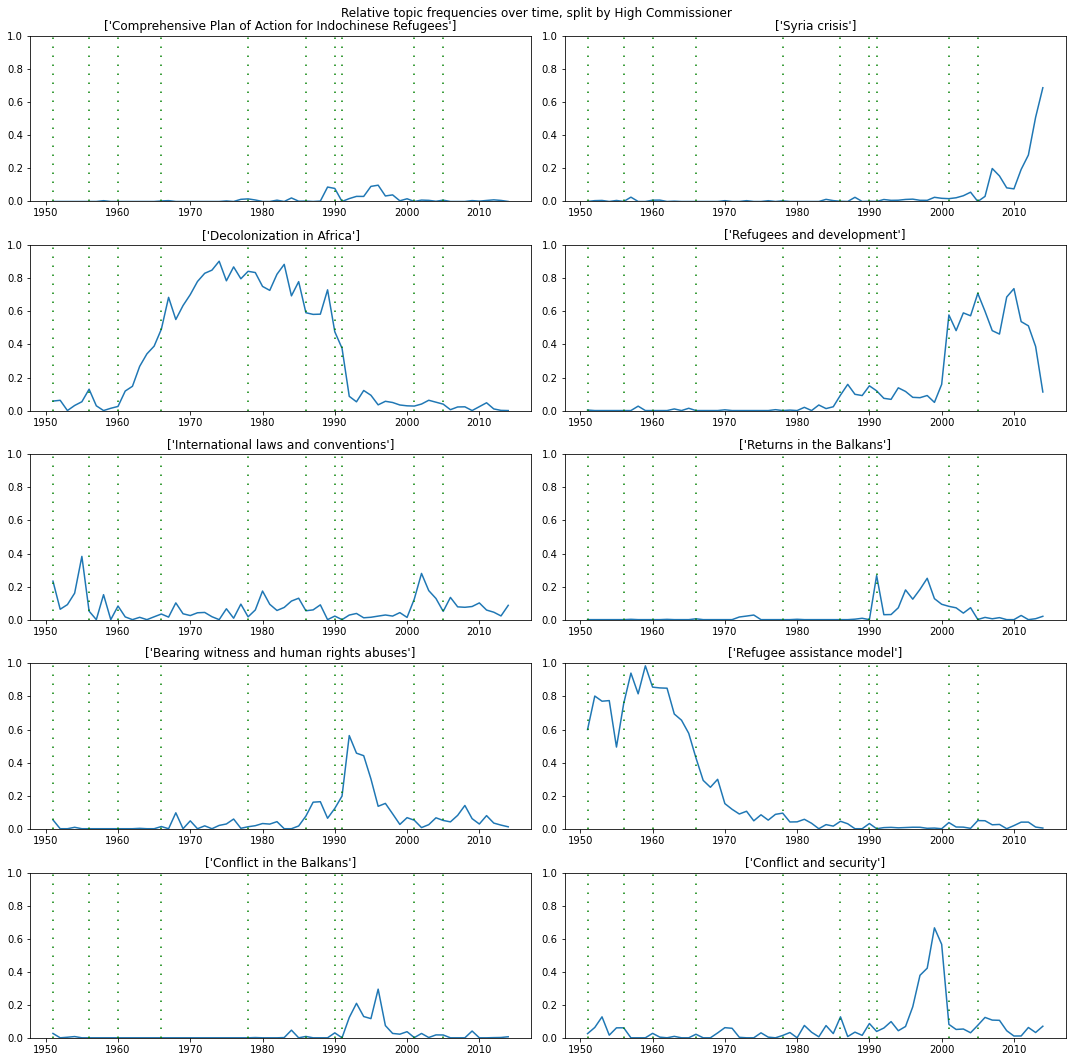

In [86]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(5, 2, figsize=(15, 15))
plt.suptitle("Relative topic frequencies over time, split by High Commissioner")
for j in range(1, 11):
    a = eval('ax' + str(j))
    y = eval('y' + str(j)) 
    title = list(topics_over_time.columns.values[j])
    a.plot(x, y)
    a.set_title(title)
    a.set(ylim=(0, 1))
    a.axvline(x= 1951, color='green', linestyle=(0, (1, 5)))
    a.axvline(x= 1956, color='green', linestyle=(0, (1, 5)))
    a.axvline(x= 1960, color='green', linestyle=(0, (1, 5)))
    a.axvline(x= 1966, color='green', linestyle=(0, (1, 5)))
    a.axvline(x= 1978, color='green', linestyle=(0, (1, 5)))
    a.axvline(x= 1986, color='green', linestyle=(0, (1, 5)))
    a.axvline(x= 1990, color='green', linestyle=(0, (1, 5)))
    a.axvline(x= 1991, color='green', linestyle=(0, (1, 5)))
    a.axvline(x= 2001, color='green', linestyle=(0, (1, 5)))
    a.axvline(x= 2005, color='green', linestyle=(0, (1, 5)))

plt.tight_layout()

### Trends in Topics

The above plots show trends in topics over time, with the dotted green lines representing years in which there was a transition in commissioner. Across plots, we notice a few key trends:

#### Refugee Assistance Model
The first is 'Refugee assistance model', which peaks in UNHCR's early years as they developed the model in Europe following WWII and then expanded it to other crises in Europe and then in African countries during the instability that followed decolonization. There is notably little discussion about the assistance model during the 90s under Ogata, although there is some renewed discussion under Guterres, as the appropriateness of the refugee assistance model (and particularly camps, urban refugees, and economic integration) has been a continuing theme. 

#### Decolonization in Africa
As noted above, decolonization in African countries in the 60s was followed by a period of massive displacement, contributing to UNHCR massively expanding its mandate and undertaking refugee assistance activities in this context. Notably, this topic dominated speeches across all three commissioners during this period, suggesting that commissioners were _reacting_ to the situation rather than trying to drive any change in UNHCR policy. 

#### Balkans, Conflict, and Advocacy
Four topics experience surges in frequency during the 90s: the two Balkans topics, conflict and security, and bearing witness and human rights abuses. Notably, UNHCR's intervention in the Balkans during the Yugoslav Wars under Ogata represented one of the first times UNHCR was offering assistance to displaced people in a context of open conflict (as opposed to those who had fled conflict to a country of asylum). It is also interesting to note the mirrored trends between bearing witness and human rights abuses and conflict and security. At the beginning of the Yugoslav Wars, speeches focused more on former, suggesting the Ogata was pushing to advocate on behalf people displaced in the conflict to protect their rights. However, as the conflict shifts, so too does the focus of her messaging to raise awareness of the conflict itself, perhaps to pressure the international community to push for peace. 

#### Refugees and Development
While the refugees and development topic sees a small rise in the late 80s and 90s, as humanitarian practitioners began speaking more about tying refugee assistance to economic development, the topic saw a jump in prominence in 2001, coinciding both with the beginning of Lubbers' tenure, the launch of the Millennium Development Goals by the United Nations, and the end of the Yugoslav Wars. This trend in particular suggests high commissioners may be able to drive shifts in UNHCR focus, since Lubbers shifted the focus away from conflict and advocacy to refugees and development even as UNHCR continued to operate in open conflict contexts throughout the early 21st situation. 

#### Crisis in Syria
Again, a headline crisis is driving the conversation here, with a spike in this topic following the beginning of the crisis in Syria 2011 (notably at the expense of 'Refugees and development'), suggesting that current events take priority over high commissioner policy priorities. 

#### Other noteworthy trends
Two other trends bear noting. First is that while international laws and conventions are a persistent topic, they are persistently relatively low, despite in theory provide the basis for UNHCR's programming and advocacy. This suggests that, while this topic provides a backbone or throughline for UNHCR messaging across commissioners (this could be the "policy inertia") there is substantial room for high commissioners to shape their messaging in response to particular crises or themes of choice. Second, it is worth highlighting the topic 'Comprehensive Plan of Action for Indochinese Refugees', which remains low frequency even during its peak, which occurred concurrently with the Yugoslav Wars. The CPA has been lauded as an example of international cooperation to address the needs of refugees; the fact that such little attention was paid attention to this success suggests that (optimistically) Ogata was prioritizing on areas of highest need or (cynically) tapping into where the media's attention was focused. 

#### Sources:
- [UNHCR: Previous High Commissioner](https://www.unhcr.org/en-us/previous-high-commissioners.html)
- [History of UNHCR](https://www.unhcr.org/en-us/history-of-unhcr.html)
- [UNHCR and ICRC in the former Yugoslavia: Bosnia and Herzegovina](https://www.icrc.org/en/doc/assets/files/other/781_806_young.pdf)
- [Mind the gap! UNHCR, humanitarian assistance, and the development process](https://www.unhcr.org/3b309dd07.pdf)
- [Millennium Development Goals: Background](https://www.un.org/millenniumgoals/bkgd.shtml)
- [The Comprehensive Plan of Action for Indochinese Refugees, 1989–1997: Sharing the Burden and Passing the Buck](https://academic.oup.com/jrs/article/17/3/319/1571884?login=false)

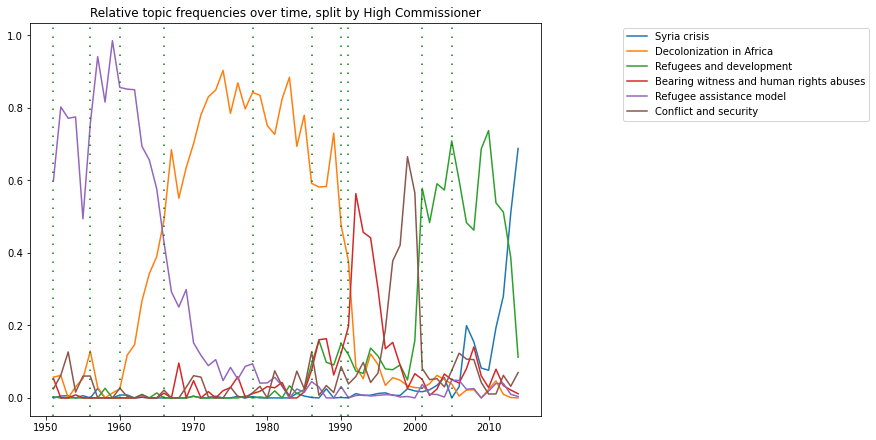

In [80]:
plt.figure(figsize=(12, 6), layout = 'constrained')
#plt.plot(x, y1, label = 'Comprehensive Plan of Action for Indochinese Refugees')
plt.plot(x, y2, label = 'Syria crisis')
plt.plot(x, y3, label = 'Decolonization in Africa')
plt.plot(x, y4, label = 'Refugees and development')
#plt.plot(x, y5, label = 'International laws and conventions')
#plt.plot(x, y6, label = 'Returns in the Balkans')
plt.plot(x, y7, label = 'Bearing witness and human rights abuses')
plt.plot(x, y8, label = 'Refugee assistance model')
#plt.plot(x, y9, label = 'Conflict in the Balkans')
plt.plot(x, y10, label = 'Conflict and security')
plt.axvline(x= 1951, color='green', linestyle=(0, (1, 5)))
plt.axvline(x= 1956, color='green', linestyle=(0, (1, 5)))
plt.axvline(x= 1960, color='green', linestyle=(0, (1, 5)))
plt.axvline(x= 1966, color='green', linestyle=(0, (1, 5)))
plt.axvline(x= 1978, color='green', linestyle=(0, (1, 5)))
plt.axvline(x= 1986, color='green', linestyle=(0, (1, 5)))
plt.axvline(x= 1990, color='green', linestyle=(0, (1, 5)))
plt.axvline(x= 1991, color='green', linestyle=(0, (1, 5)))
plt.axvline(x= 2001, color='green', linestyle=(0, (1, 5)))
plt.axvline(x= 2005, color='green', linestyle=(0, (1, 5)))
plt.legend(bbox_to_anchor=(1.15,1))
plt.title("Relative topic frequencies over time, split by High Commissioner")
plt.show()
graph

## Conclusion

Overall, I have presented an overview of the main topics covered in UNHCR High Commissioner speeches from 1951 and 2014 and trends in their frequency over time. Comparing these trends to the tenures of high commissioners, we see that - at least for the first four decades - high commissioner speeches seem to be driven by crises or needs rather than proactively driving policy changes. This seemingly changes with the tenure of Ogata, who takes on significant advocacy and drives conversations around security (although the extent to which this is driven by Ogata herself or in response to the Yugoslav Wars is not clear), and Lubbers likewise seems to have taken the initiative to move forward conversations around refugees and development. This suggests that Ogata's advocacy may have, at least temporarily, created (or taken advantage of and created more expectations of) space for High Commissioners to drive conversations around refugees. 

This analysis is useful - though only suggestive. It suggests that, at least in recent years, the General Assembly's selection of high commissioner does matter for how the Agency approaches crises. While this may seem obvious, this goes beyond just competence. A skilled commissioner will effectively manage the Agency, whereas an unskilled will do so poorly to the Agency's detriment. However, some institutions may have strong enough policy inertia and internal structures where a new highly skilled leader with unorthodox ideas may find themselves molded or limited by the institution. These findings suggest that it may not be the case at UNHCR - new leaders may be able to effectively introduce new approaches to refugee assistance and steer the Agency in new directions. It also means that governments, organizations, and people interfacing with the Agency should not necessarily anticipate consistent approaches with the arrival of a new commissioner, but masy need to plan for transitions and adapt engagement.   

There are two important caveats here. 

The first is that, again, given the prominence of Ogata's speeches in the corpus, four of the topics are geographically/temporally linked to her tenure. It would be interesting to know how the topics and trends may change if there were a more comparable distribution of documents per commissioner. One option could be to take a constant (set to the minimum number of speeches per year across all commissioners) random sample of speeches per year to mitigate this bias; however, given how few speeches this would be, this resulting sample may not accurately represent Otaga or Guterres speeches - the resulting topics would likely be highly dependent on the samples chosen. 

The second is that the fact that specific major crises dominated the speeches delivered by high commissioners throughout, the fact that the crises themselves took prominence does not mean the commissioners did not differ in how the spoke about the crises and responses to them. A possible area of further inquiry would be to remove references to specific geographies/crises and see how 